In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
st_data = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
netflix = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [2]:
plt.rcParams['figure.dpi'] = 200
#or dpi = 200

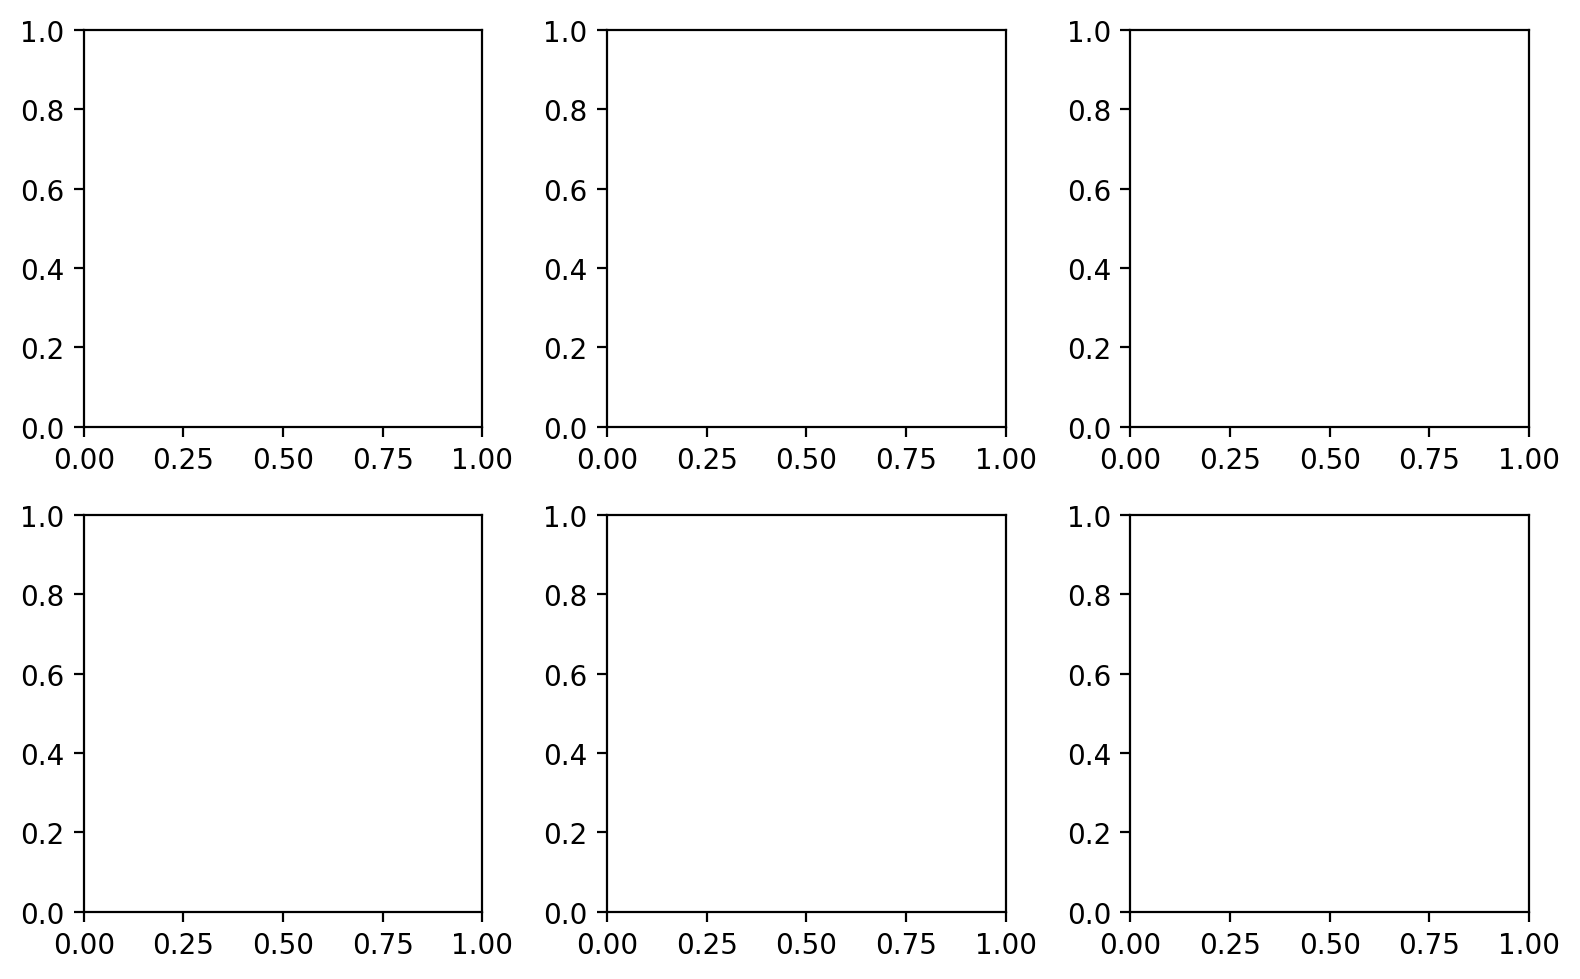

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(8, 5))
plt.tight_layout()
plt.show()

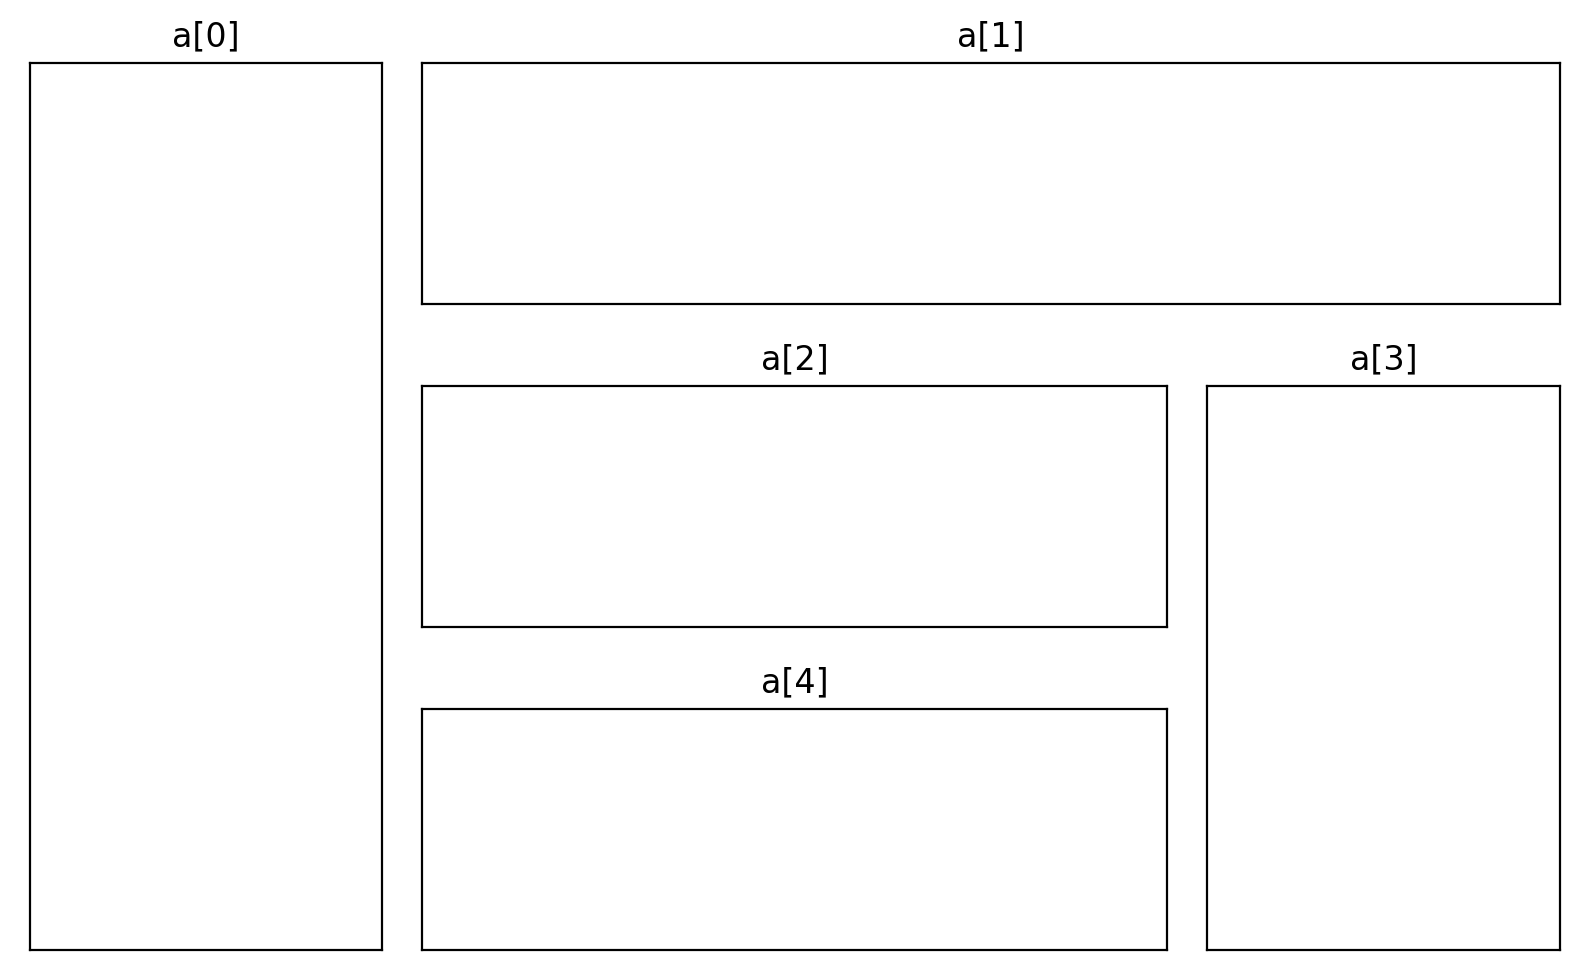

In [4]:
fig = plt.figure(figsize=(8, 5))
ax = [None for _ in range(5)]
shape = (3, 4)
ax[0] = plt.subplot2grid(shape=shape, loc=(0, 0), rowspan=3, colspan=1)
ax[1] = plt.subplot2grid(shape=shape, loc=(0, 1), rowspan=1, colspan=3)
ax[2] = plt.subplot2grid(shape=shape, loc=(1, 1), rowspan=1, colspan=2)
ax[3] = plt.subplot2grid(shape=shape, loc=(1, 3), rowspan=2, colspan=1)
ax[4] = plt.subplot2grid(shape=shape, loc=(2, 1), rowspan=1, colspan=2)

for i in range(5):
    ax[i].set_title(f'a[{i}]')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

In [5]:
netflix.loc[0, 'date_added'].split(' ')[0]

'August'

In [6]:
netflix.loc[0, 'date_added'].split(', ')

['August 14', '2020']

In [7]:
netflix_date = netflix[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].map(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].map(lambda x: x.lstrip().split(' ')[0])

In [8]:
netflix_date[netflix_date['year'] == '2013']

,date_added,year,month
220,"November 1, 2013",2013,November
649,"November 1, 2013",2013,November
1089,"August 2, 2013",2013,August
2503,"October 8, 2013",2013,October
2948,"September 1, 2013",2013,September
3098,"March 31, 2013",2013,March
5312,"October 14, 2013",2013,October
5314,"October 14, 2013",2013,October
5587,"December 29, 2013",2013,December
6056,"September 1, 2013",2013,September


In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
month_order

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March',
 'February',
 'January']

In [10]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df.head(30)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,23.0,96.0,118.0,190.0,222.0,175.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,5.0,4.0,46.0,88.0,160.0,272.0,158.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,15.0,52.0,131.0,192.0,204.0,173.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,119.0,127.0,136.0,178.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0,115.0,169.0,145.0,144.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,80.0,157.0,169.0,156.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,95.0,78.0,175.0,167.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,13.0,88.0,101.0,159.0,173.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,95.0,118.0,171.0,188.0,0.0


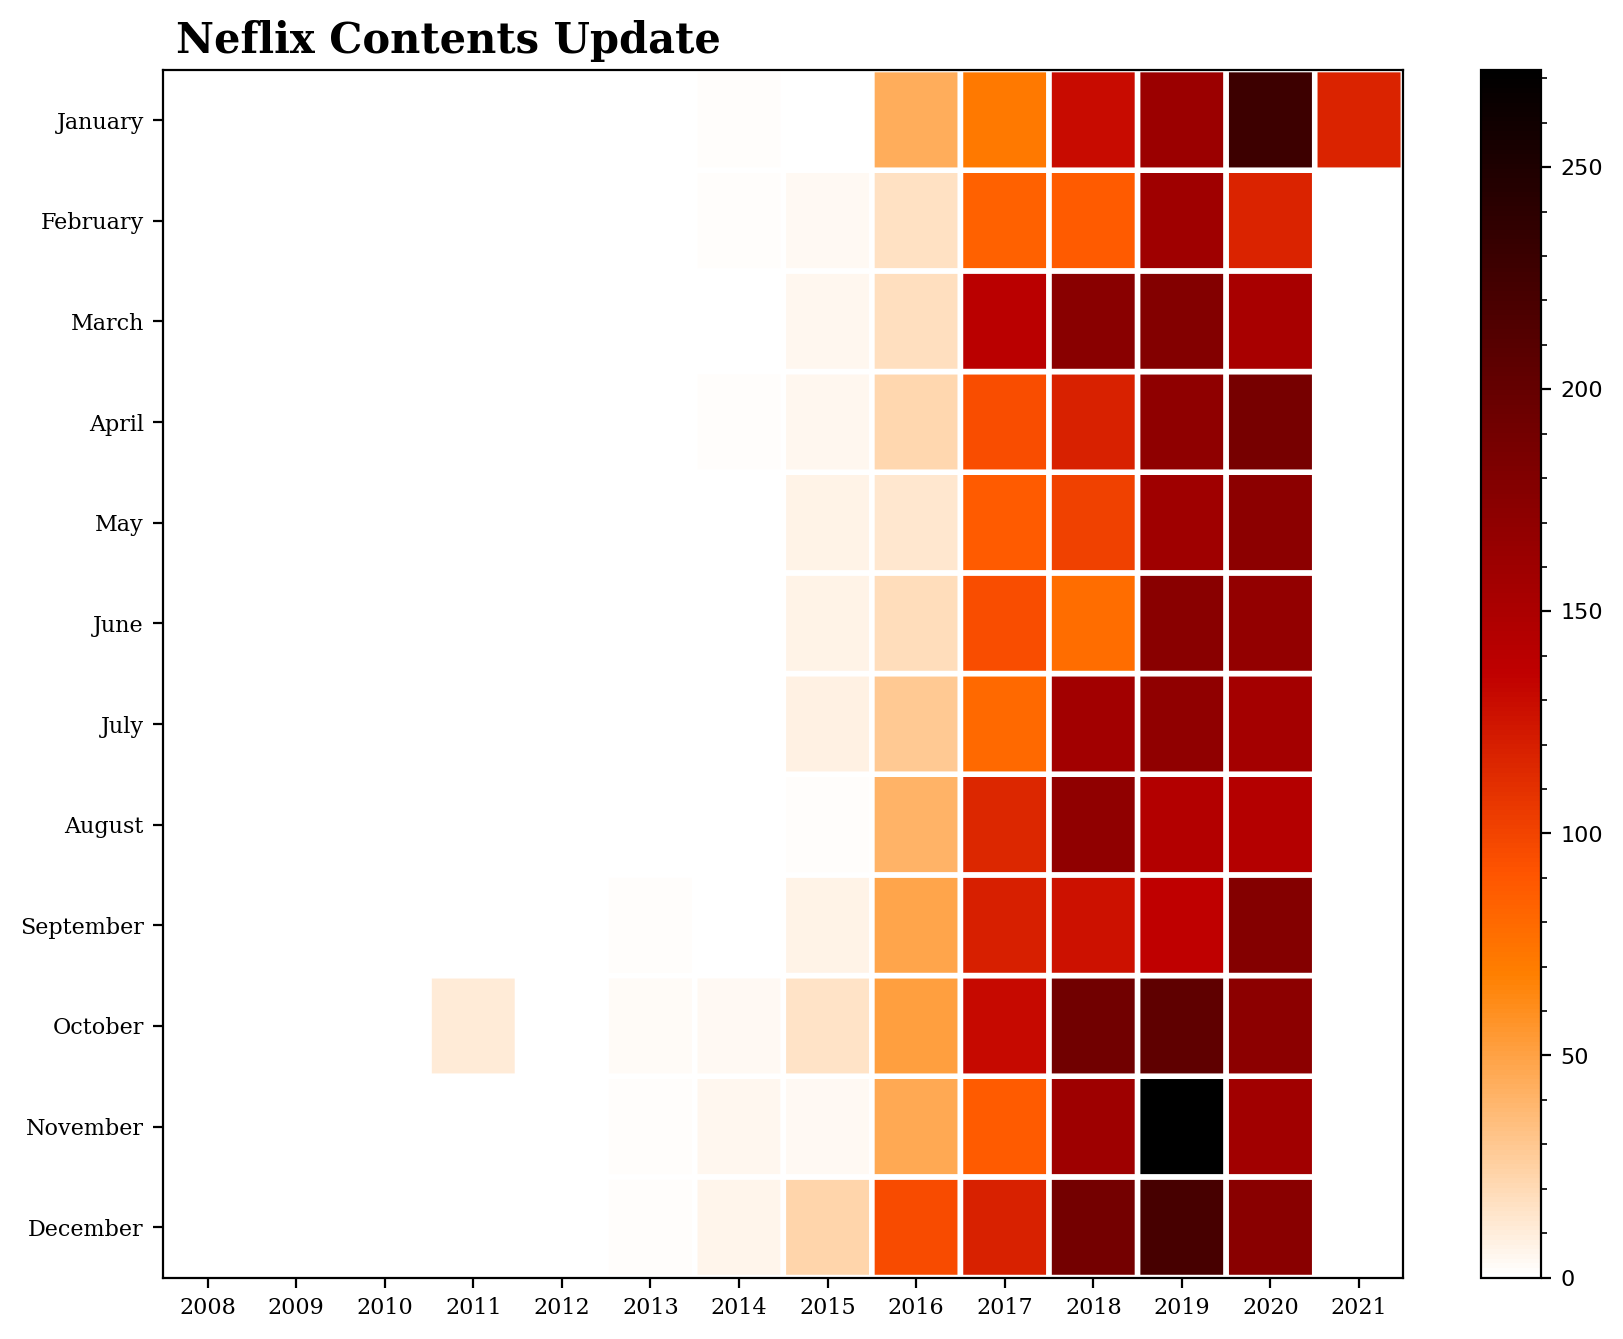

In [11]:
fig = plt.figure(figsize=(10, 8), dpi=200)
plt.pcolor(df, edgecolors='white', linewidths=2, cmap='gist_heat_r')
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=8, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=8, fontfamily='serif')
plt.title('Neflix Contents Update', size=15, fontfamily='serif', fontweight='bold', position=(0.23, 1.2))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

Text(0.9, 0.1, 'Test')

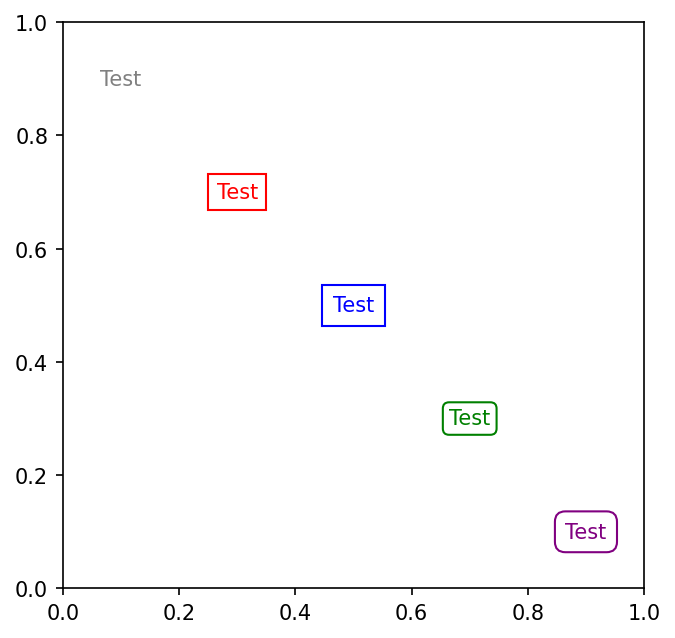

In [12]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
ax.text(0.1, 0.9, 'Test', color='gray', ha='center', va='center')
ax.text(0.3, 0.7, 'Test', color='red', ha='center', va='center',
        bbox=dict(facecolor='none', edgecolor='red'))
ax.text(0.5, 0.5, 'Test', color='blue', ha='center', va='center',
       bbox=dict(facecolor='none', edgecolor='blue', pad=5))
ax.text(0.7, 0.3, 'Test', color='green', ha='center', va='center',
       bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
ax.text(0.9, 0.1, 'Test', color='purple', ha='center', va='center',
       bbox=dict(facecolor='none', edgecolor='purple', boxstyle='round', pad=0.5))

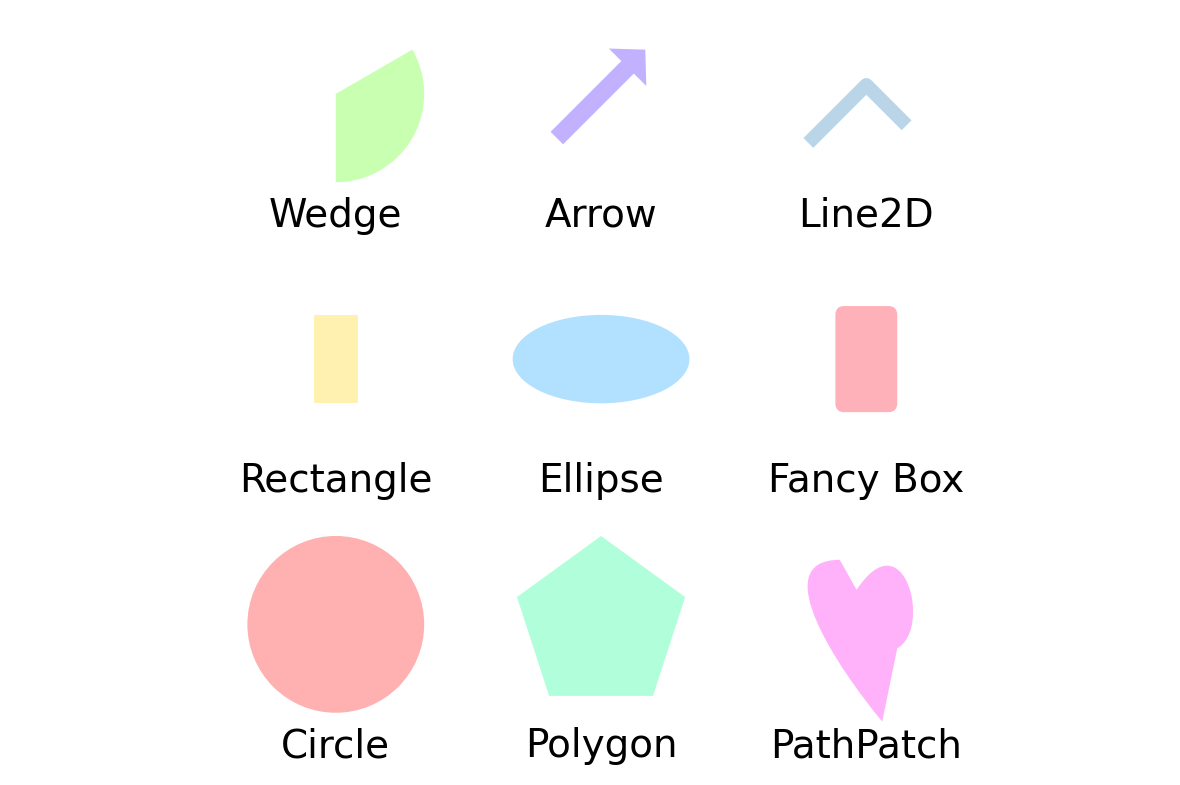

In [13]:
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def label(coor, text):
    y = coor[1] - 0.15
    plt.text(coor[0], y, text, ha='center', family='sans_serif', size=14)
    
fig, ax = plt.subplots()
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
patches = []

circle = mpatches.Circle(grid[0], 0.1)
patches.append(circle)
label(grid[0], 'Circle')

rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1)
patches.append(rect)
label(grid[1], 'Rectangle')

wedge = mpatches.Wedge(grid[2], 0.1, 270, 30)
patches.append(wedge)
label(grid[2], 'Wedge')

polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], 'Polygon')

ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], 'Ellipse')

arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1, width=0.1)
patches.append(arrow)
label(grid[5], 'Arrow')

Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

fancybox = mpatches.FancyBboxPatch(grid[7] - [0.025, 0.05], 0.05, 0.1, boxstyle=mpatches.BoxStyle('round', pad=0.01))
patches.append(fancybox)
label(grid[7], 'Fancy Box')

x, y = np.array([[-0.06, 0, 0.04], [-0.05, 0.01, -0.03]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], linewidth=5, alpha=0.3)
label(grid[8], 'Line2D')

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(colors)
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()


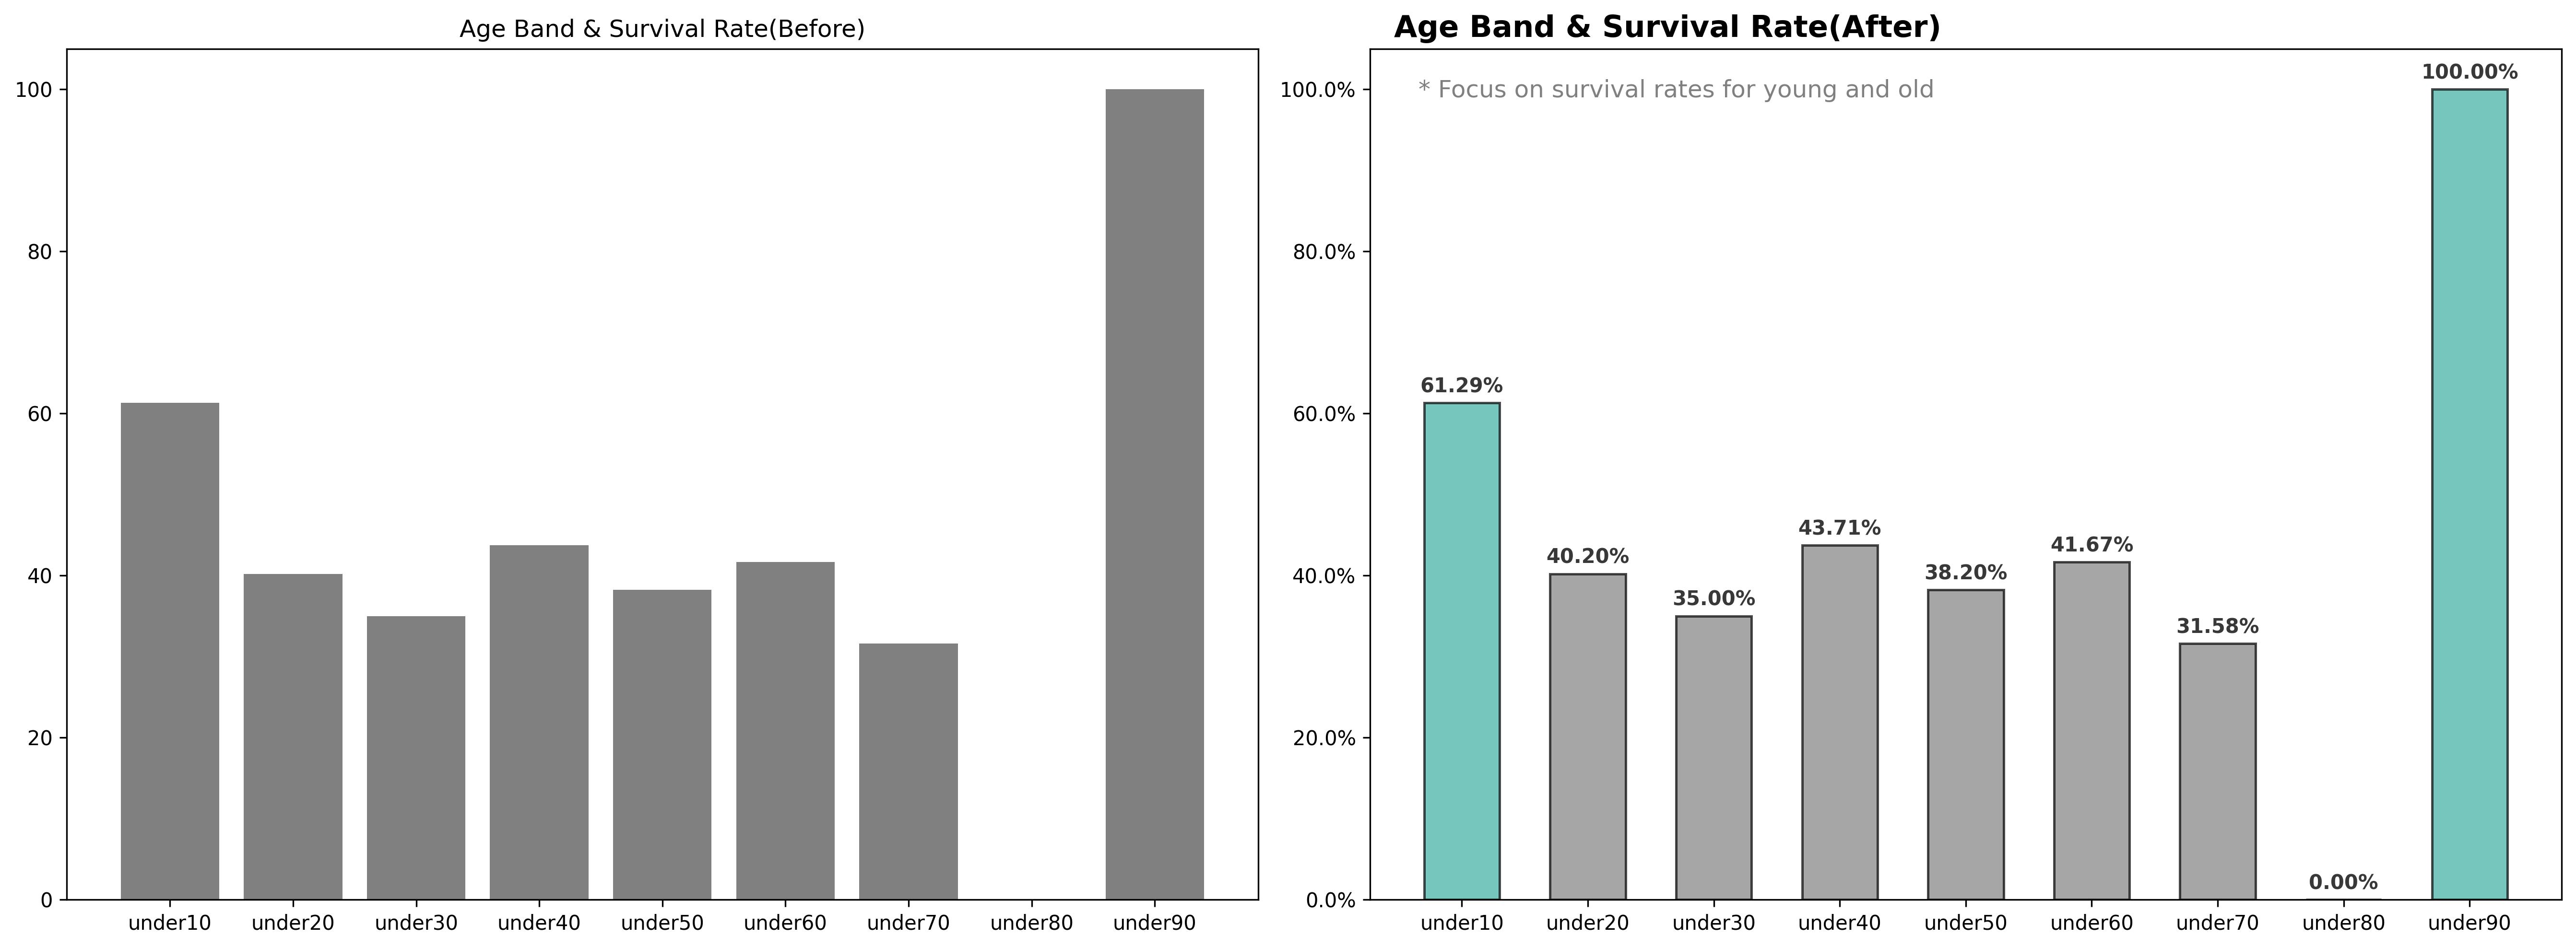

In [14]:
from matplotlib.ticker import FuncFormatter
def Age_Band(age):
    for i in range(1, 10):
        if age < 10 * i:
            return f'under{i * 10}'

titanic_train = pd.read_csv('../input/titanic/train.csv', index_col='PassengerId')
titanic_train['Age_Band'] = titanic_train['Age'].apply(Age_Band)
titanic_age = titanic_train[['Age_Band', 'Survived']].groupby('Age_Band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival_Rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 2, figsize=(18, 7), dpi=300)

ax[0].bar(titanic_age['Survival_Rate'].index, 
          titanic_age['Survival_Rate'].values, color='gray')
ax[0].set_title('Age Band & Survival Rate(Before)')

color_list = ['gray' for i in range(9)]
color_list[0] = color_list[8] = '#3caea3'
ax[1].bar(titanic_age['Survival_Rate'].index,
         titanic_age['Survival_Rate'].values, color=color_list, 
         linewidth=1.2, edgecolor='black', width=0.6, alpha=0.7)
ax[1].set_title('Age Band & Survival Rate(After)', 
                fontsize=15, fontweight='bold', 
                position=(0.25, 1.0 + 0.05))
for i in titanic_age['Survival_Rate'].index:
    ax[1].annotate(f"{titanic_age['Survival_Rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival_Rate'][i] + 2), 
                   va = 'center', ha='center',fontweight='bold',
                   color='#383838')
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:}%')) 
plt.suptitle('* Focus on survival rates for young and old', 
            x=0.65, y=0.87, color='gray')
plt.tight_layout()
plt.show()

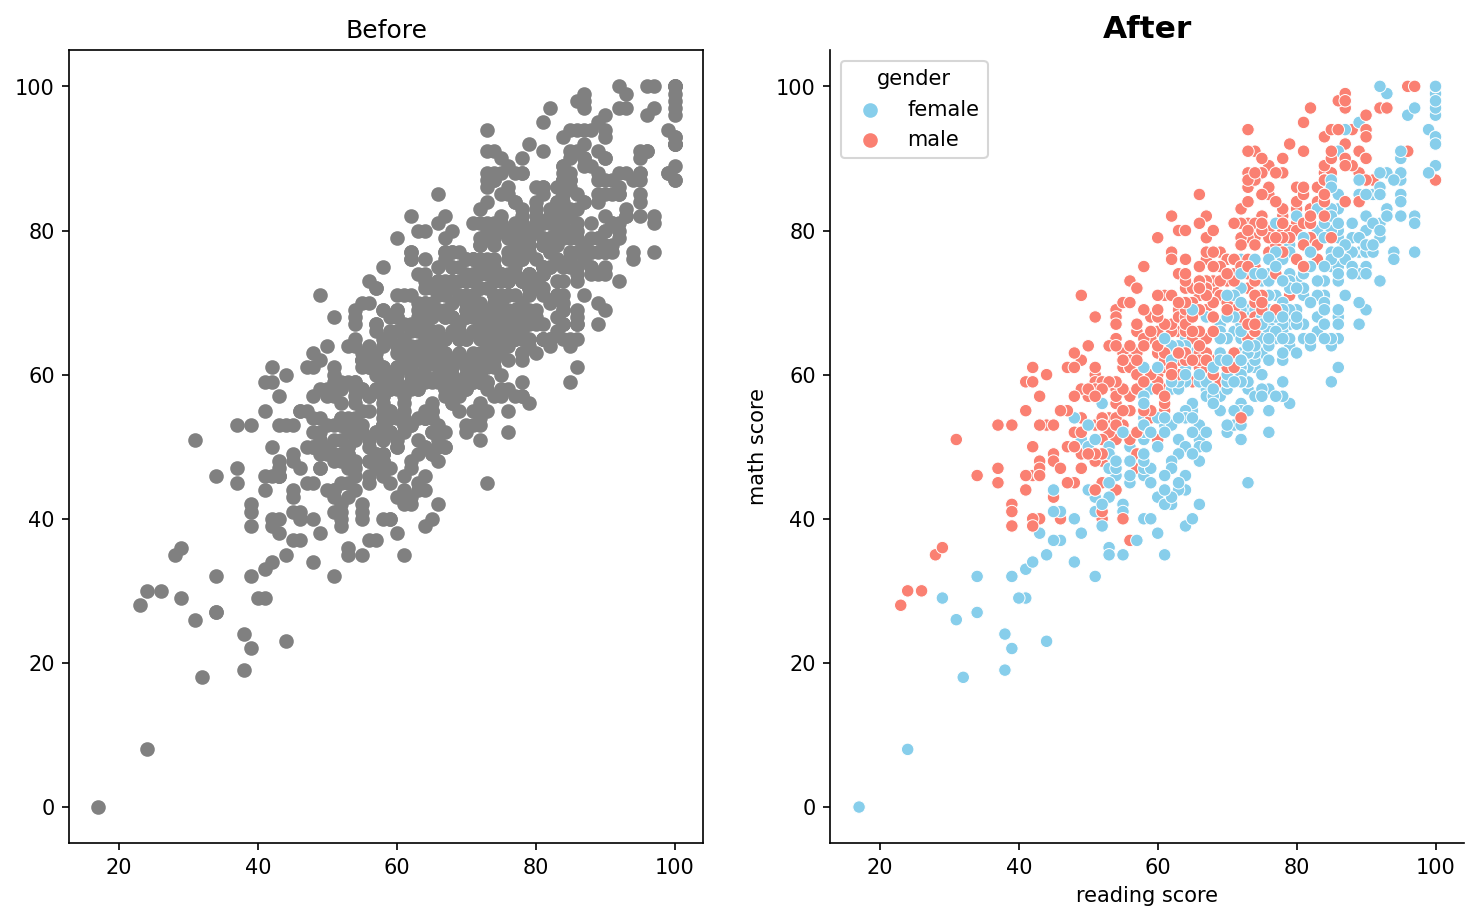

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12,7), dpi=150)
ax[0].scatter(data=st_data, y='math score', x='reading score', color='gray')
ax[0].set_title('Before')

sns.scatterplot(data=st_data, y='math score', x='reading score', palette=['skyblue', 'salmon'], hue='gender')
ax[1].set_title('After', size=15, fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [38]:
sns.set_style('whitegrid')
movie = netflix[netflix['type'] == 'Movie']
movie_rating = movie['rating'].value_counts()[rating_order]
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

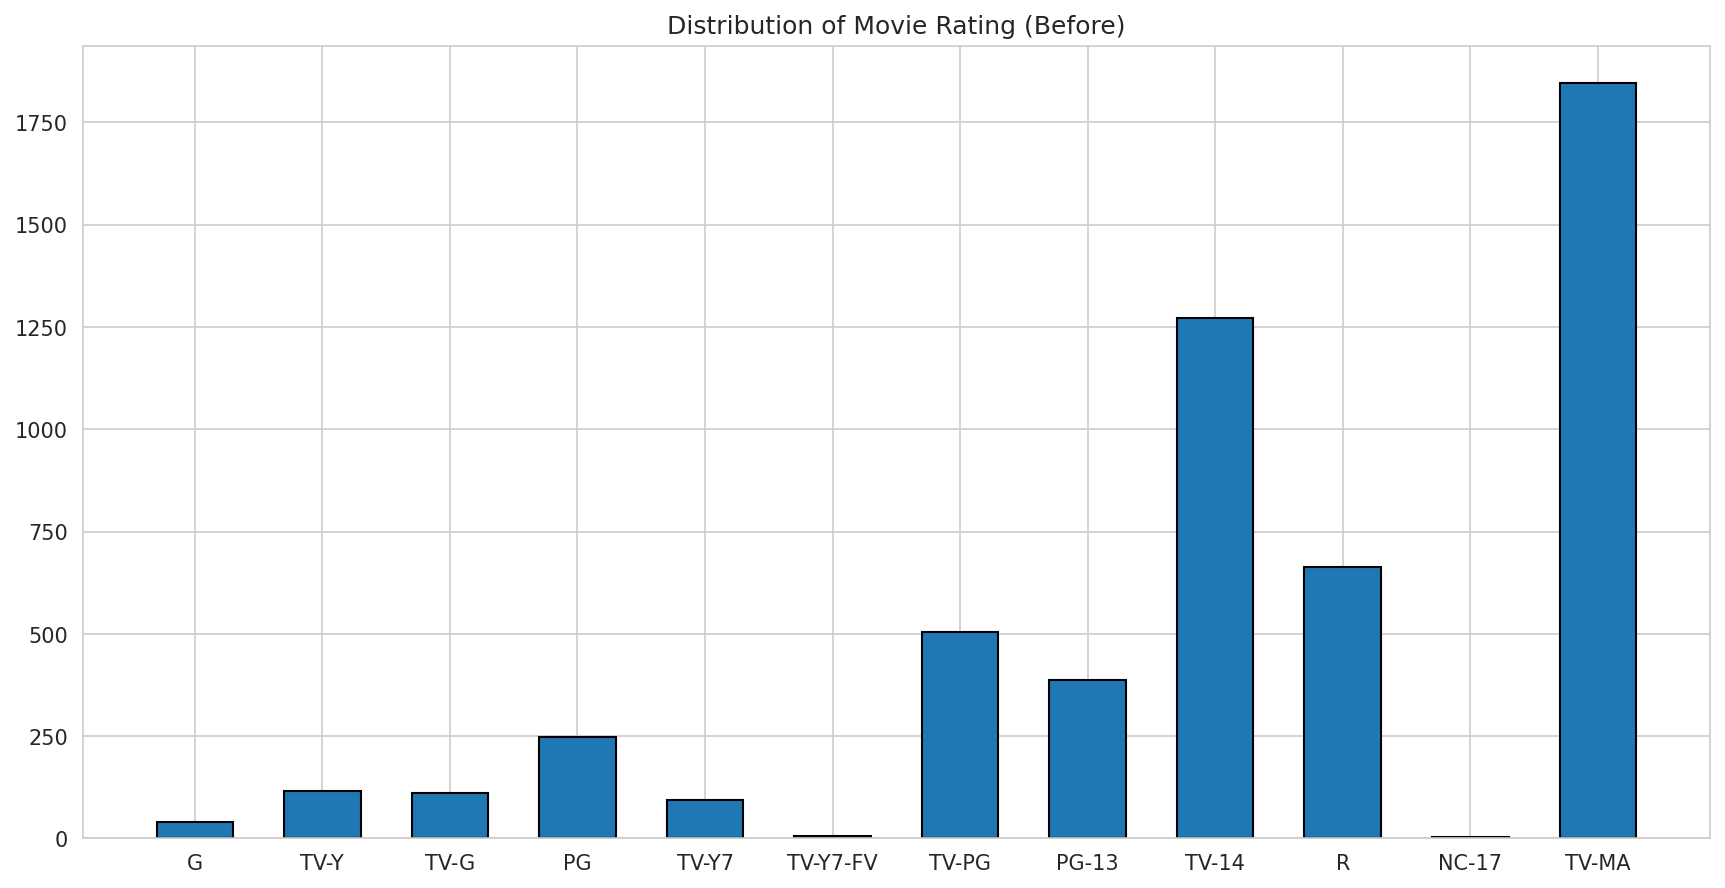

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax.bar(movie_rating.index, movie_rating.values, edgecolor='black', width=0.6)
ax.set_title('Distribution of Movie Rating (Before)')
plt.show()

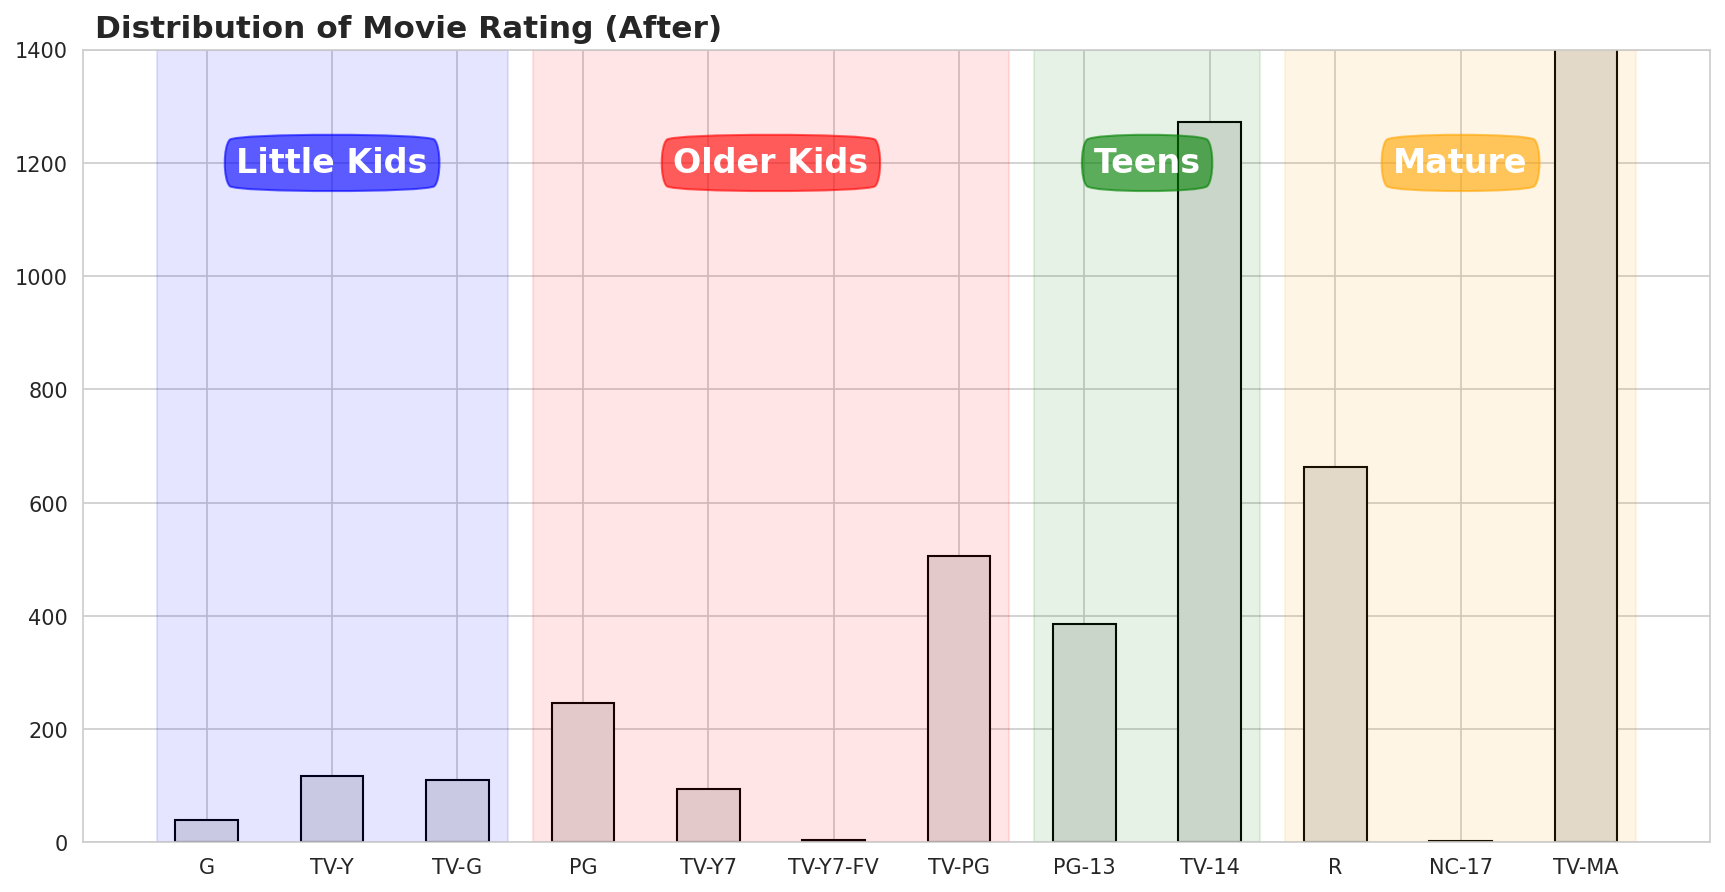

In [95]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
    if h_lim:
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data.values, edgecolor='black', width=0.5, color='#e0e0e0')
    colors=['blue', 'red', 'green', 'orange']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]
    
    for index, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title, xy=(sum(span_range[index]) / 2, height), xytext=(0, 0), textcoords='offset points', 
                   va='center', ha='center', color='w', fontsize=16, fontweight='bold', 
                    bbox=dict(boxstyle='round4', pad=0.4, color=colors[index], alpha=0.6))
        ax.axvspan(span_range[index][0] - 0.4, span_range[index][1] + 0.4, color=colors[index], alpha=0.1)
    ax.set_title('Distribution of Movie Rating (After)', fontsize=15, fontweight='bold', 
                    position=(0.2, 1.03))
    plt.show()
    
rating_barplot(movie_rating, 'Distribution of Movie Rating', 1200, 1400)

In [50]:
span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]
sum(span_range[])

9